## Brexit Data From Twitter

Here, we take a look at Brexit related top-tweets in Twitter, dates ranging from June 01, 2016 to July 15, 2016. The Brexit referendum happened on June 23, 2016.

In [1]:
from processor.tweet_processor import TweetProcessor
from matplotlib import pyplot as plt
import os
import re
import pandas as pd

pjoin = os.path.join

In [2]:
tweet_csv_dir = './data/tweet/brexit'

tweet_csv_file = pjoin(tweet_csv_dir, 'brexit_2016-06-01_2016-07-15_toptweets_10000.csv')

df = pd.read_csv(tweet_csv_file, parse_dates=[1], error_bad_lines=False, delimiter=';')
df.head()

b'Skipping line 408: expected 10 fields, saw 11\nSkipping line 536: expected 10 fields, saw 11\nSkipping line 1066: expected 10 fields, saw 12\nSkipping line 2172: expected 10 fields, saw 11\nSkipping line 2636: expected 10 fields, saw 11\nSkipping line 2809: expected 10 fields, saw 11\nSkipping line 4051: expected 10 fields, saw 11\nSkipping line 7702: expected 10 fields, saw 11\nSkipping line 7729: expected 10 fields, saw 11\nSkipping line 8348: expected 10 fields, saw 11\nSkipping line 9054: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,bennsully,2016-07-15 01:50:00,30,38,How Sky News is making this attack about Brexi...,NaN,NaN,#Nice #SkyNews,7.537234e+17,https://twitter.com/bennsully/status/753723374...
1,EUdMissIt,2016-07-15 01:21:00,4,7,Where is the voice sayingthis whole brexit is ...,NaN,NaN,NaN,7.537162e+17,https://twitter.com/EUdMissIt/status/753716159...
2,RosChappell,2016-07-15 01:14:00,52,53,Don't let truth & reason die THERE IS NO MANDA...,NaN,@acgrayling @JaniAllan @MarikaSboros @Dr_Jim1 ...,NaN,7.537144e+17,https://twitter.com/RosChappell/status/7537144...
3,nickreeves9876,2016-07-15 00:46:00,8,7,Brilliant article on why #Brexit is a disaster...,NaN,NaN,#Brexit #Remain #StrongerIn,7.537072e+17,https://twitter.com/nickreeves9876/status/7537...
4,Sppakko,2016-07-15 00:42:00,0,1,"Die einen wollen #Deutschland abschaffen, die ...",NaN,NaN,#Deutschland #Europa #IS #Brexit #Illner,7.537063e+17,https://twitter.com/Sppakko/status/75370626862...


In [3]:
# Add separate date and time columns
df.rename(columns={'date' : 'DateTime'}, inplace=True)

df['Date'] = df['DateTime'].dt.date

# Set date as the index for df
df.set_index('Date', inplace=True)

# Drop ID, geo columns'
del df['id']
del df['geo']

df.head()


,username,DateTime,retweets,favorites,text,mentions,hashtags,permalink
Date,,,,,,,,
2016-07-15,bennsully,2016-07-15 01:50:00,30,38,How Sky News is making this attack about Brexi...,NaN,#Nice #SkyNews,https://twitter.com/bennsully/status/753723374...
2016-07-15,EUdMissIt,2016-07-15 01:21:00,4,7,Where is the voice sayingthis whole brexit is ...,NaN,NaN,https://twitter.com/EUdMissIt/status/753716159...
2016-07-15,RosChappell,2016-07-15 01:14:00,52,53,Don't let truth & reason die THERE IS NO MANDA...,@acgrayling @JaniAllan @MarikaSboros @Dr_Jim1 ...,NaN,https://twitter.com/RosChappell/status/7537144...
2016-07-15,nickreeves9876,2016-07-15 00:46:00,8,7,Brilliant article on why #Brexit is a disaster...,NaN,#Brexit #Remain #StrongerIn,https://twitter.com/nickreeves9876/status/7537...
2016-07-15,Sppakko,2016-07-15 00:42:00,0,1,"Die einen wollen #Deutschland abschaffen, die ...",NaN,#Deutschland #Europa #IS #Brexit #Illner,https://twitter.com/Sppakko/status/75370626862...


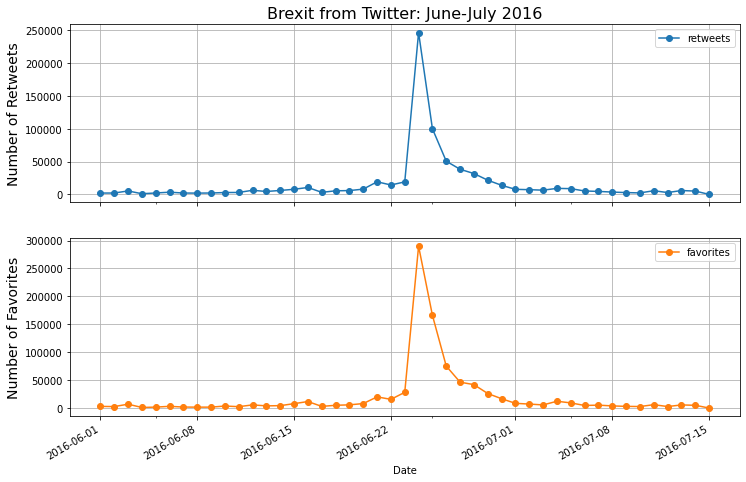

In [5]:
# Group by date
grouped = df.groupby('Date').sum()

axes = grouped[['retweets', 'favorites']].plot(subplots=True, figsize=(12,8), marker='o', grid=True)
axes[0].set_ylabel('Number of Retweets', fontsize=14)
axes[0].set_title('Brexit from Twitter: June-July 2016', fontsize=16)
axes[1].set_ylabel('Number of Favorites', fontsize=14)

plt.savefig('./fig/tweet/brexit_junejuly2016.pdf')

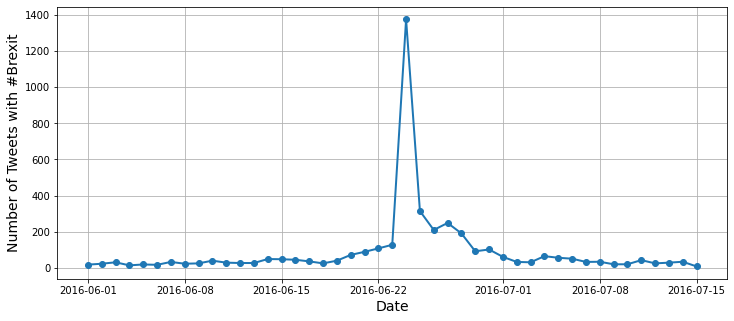

In [6]:
# Look at number of tweets with #Brexit hashtag 

num_tweets = df['hashtags'].str.contains('Brexit').groupby('Date').sum()
ax = num_tweets.plot(figsize=(12,5), marker='o', lw=2, grid=True)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Tweets with #Brexit', fontsize=14)
plt.savefig('./fig/tweet/num_tweets_with_brexithash.pdf')


## Get Most Frequently Used Words

Here, we analyze the most commonly used words in these tweets.

In [3]:
p = TweetProcessor(tweet_csv_file)

# Get 10 most common words used
# Stopwords are removed automatically
most_common_words = p.get_most_common_words(extra_words_to_remove=['brexit'])

b'Skipping line 408: expected 10 fields, saw 11\nSkipping line 536: expected 10 fields, saw 11\nSkipping line 1066: expected 10 fields, saw 12\nSkipping line 2172: expected 10 fields, saw 11\nSkipping line 2636: expected 10 fields, saw 11\nSkipping line 2809: expected 10 fields, saw 11\nSkipping line 4051: expected 10 fields, saw 11\nSkipping line 7702: expected 10 fields, saw 11\nSkipping line 7729: expected 10 fields, saw 11\nSkipping line 8348: expected 10 fields, saw 11\nSkipping line 9054: expected 10 fields, saw 11\n'


Processing tweet: 1521/9760

Processing tweet: 3024/9760

Processing tweet: 4441/9760

Processing tweet: 7404/9760

Processing tweet: 8857/9760

Processing tweet: 9760/9760


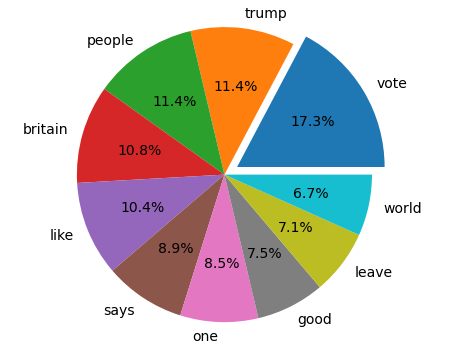

In [4]:
# Get a pie chart of most commonly used words

common_words, counts = most_common_words[:,0], most_common_words[:,1]

explode = [0.1] + [0]*9

fig, ax = plt.subplots(1,1,figsize=(8,6))
patches, texts, autotexts = ax.pie(counts, labels=common_words, autopct='%.1f%%', explode=explode)
ax.axis('equal')

for text, autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)
    
plt.savefig('./fig/tweet/brexit_pie_chart.pdf')

## Sentiment Analysis

Using the sentiment classifier trained on a different set of tweets, use the classifier to analyze the sentiment in Twitter data.

In [4]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [5]:
# Load the classifier from pickle file
pkl_dir = './data/tweet/sentiment_analysis/pkl'
pkl_file = pjoin(pkl_dir, 'classifier.pkl')

with open(pkl_file, 'rb') as f:
    clf = pickle.load(f)

# 0: unhappy, 4: happy
clf.classes_, clf.n_features_

(array([0, 4]), 237222)

In [6]:
pkl_file_vect = pjoin(pkl_dir, 'vectorizer.pkl')

with open(pkl_file_vect, 'rb') as f:
    vectorizer = pickle.load(f)

vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [7]:
# Transform tweet text data to use scikit-learn classifier
tweet_text = df['text'].values.tolist()

X = vectorizer.transform(tweet_text)
X.shape

(9760, 237222)

In [8]:
# Predict!
df['Predicted Sentiment'] = clf.predict(X)

# Transform sentiment values:
# Unhappy = -1
# Happy = -1

df['Predicted Sentiment'] = df['Predicted Sentiment'].map({0: -1, 4: 1})

df.head()

,username,DateTime,retweets,favorites,text,mentions,hashtags,permalink,Predicted Sentiment
Date,,,,,,,,,
2016-07-15,bennsully,2016-07-15 01:50:00,30,38,How Sky News is making this attack about Brexi...,NaN,#Nice #SkyNews,https://twitter.com/bennsully/status/753723374...,-1
2016-07-15,EUdMissIt,2016-07-15 01:21:00,4,7,Where is the voice sayingthis whole brexit is ...,NaN,NaN,https://twitter.com/EUdMissIt/status/753716159...,-1
2016-07-15,RosChappell,2016-07-15 01:14:00,52,53,Don't let truth & reason die THERE IS NO MANDA...,@acgrayling @JaniAllan @MarikaSboros @Dr_Jim1 ...,NaN,https://twitter.com/RosChappell/status/7537144...,-1
2016-07-15,nickreeves9876,2016-07-15 00:46:00,8,7,Brilliant article on why #Brexit is a disaster...,NaN,#Brexit #Remain #StrongerIn,https://twitter.com/nickreeves9876/status/7537...,1
2016-07-15,Sppakko,2016-07-15 00:42:00,0,1,"Die einen wollen #Deutschland abschaffen, die ...",NaN,#Deutschland #Europa #IS #Brexit #Illner,https://twitter.com/Sppakko/status/75370626862...,1


In [9]:
df[['text', 'Predicted Sentiment']].head()

,text,Predicted Sentiment
Date,,
2016-07-15,How Sky News is making this attack about Brexi...,-1
2016-07-15,Where is the voice sayingthis whole brexit is ...,-1
2016-07-15,Don't let truth & reason die THERE IS NO MANDA...,-1
2016-07-15,Brilliant article on why #Brexit is a disaster...,1
2016-07-15,"Die einen wollen #Deutschland abschaffen, die ...",1


In [10]:
df['Predicted Sentiment'].groupby('Date').value_counts().unstack().head()

Predicted Sentiment,-1,1
Date,,
2016-06-01,16,30
2016-06-02,27,30
2016-06-03,17,37
2016-06-04,8,20
2016-06-05,13,36


## Sentiment Classifier With TextBlob

Here, we use Textblob's sentiment classifier to compare results on the tweets.

In [11]:
from textblob import TextBlob
import numpy as np

In [12]:
def textblob_sentiment(tweet):
    polarity_score = TextBlob(tweet).sentiment.polarity
    return polarity_score

def get_sentiment(score):
    return 1 if score >= 0 else -1

df['TextBlob Sentiment Score'] = df['text'].apply(textblob_sentiment)
df['TextBlob Sentiment'] = df['TextBlob Sentiment Score'].apply(get_sentiment)

df['sentiment_match'] = df['Predicted Sentiment'] == df['TextBlob Sentiment']

# Cleanup
cleandf = df.drop(columns=['username', 'retweets', 'favorites', 'mentions', 'hashtags', 'permalink'])

cleandf.head()

,DateTime,text,Predicted Sentiment,TextBlob Sentiment Score,TextBlob Sentiment,sentiment_match
Date,,,,,,
2016-07-15,2016-07-15 01:50:00,How Sky News is making this attack about Brexi...,-1,-0.05,-1,True
2016-07-15,2016-07-15 01:21:00,Where is the voice sayingthis whole brexit is ...,-1,0.30,1,False
2016-07-15,2016-07-15 01:14:00,Don't let truth & reason die THERE IS NO MANDA...,-1,0.00,1,False
2016-07-15,2016-07-15 00:46:00,Brilliant article on why #Brexit is a disaster...,1,0.90,1,True
2016-07-15,2016-07-15 00:42:00,"Die einen wollen #Deutschland abschaffen, die ...",1,0.00,1,True


In [13]:
sentiment_matches_by_date = df.groupby('Date')['sentiment_match'].value_counts().unstack()

sentiment_matches_by_date['% True Classified'] = sentiment_matches_by_date[True]*100 / (sentiment_matches_by_date[True] + sentiment_matches_by_date[False])
sentiment_matches_by_date.head()


sentiment_match,False,True,% True Classified
Date,,,
2016-06-01,15,31,67.391304
2016-06-02,30,27,47.368421
2016-06-03,16,38,70.370370
2016-06-04,7,21,75.000000
2016-06-05,8,41,83.673469


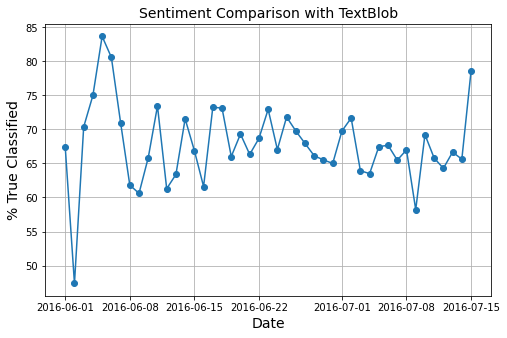

In [14]:
ax = sentiment_matches_by_date['% True Classified'].plot(marker='o', figsize=(8,5), grid=True)
ax.set_ylabel('% True Classified', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_title('Sentiment Comparison with TextBlob', fontsize=14)
plt.savefig('./fig/tweet/sentiment/percent_agreement_with_textblob.pdf')

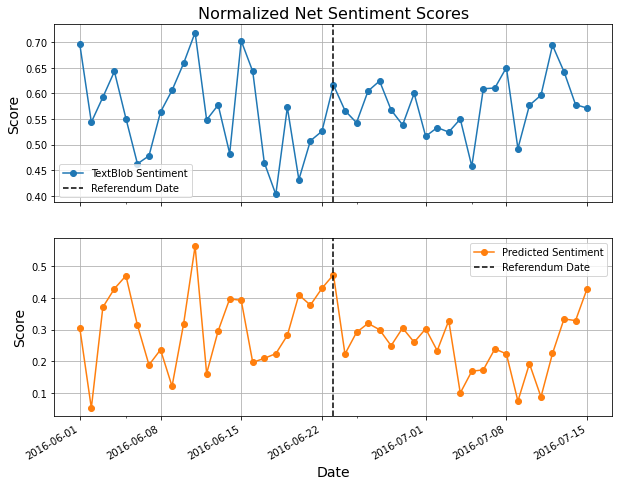

In [69]:
grouped = df[['TextBlob Sentiment', 'Predicted Sentiment']].groupby('Date')
num_tweets = grouped.count()
total_sentiment = grouped.sum()

# Get average net sentiment in each date
avg_sentiment = total_sentiment / num_tweets 
axes = avg_sentiment.plot(subplots=True, figsize=(10,8), grid=True, marker='o')
axes[0].set_title('Normalized Net Sentiment Scores', fontsize=16)
axes[0].set_ylabel('Score', fontsize=14)
axes[1].set_ylabel('Score', fontsize=14)
axes[1].set_xlabel('Date', fontsize=14)

for ax in axes:
    ylim = ax.get_ylim()
    ax.plot([pd.to_datetime('2016-06-23'), pd.to_datetime('2016-06-23')], ylim,'k--',label='Referendum Date')
    ax.set_ylim(ylim)
    ax.legend()

plt.savefig('./fig/tweet/sentiment/norm_net_sentiment_scores.pdf')

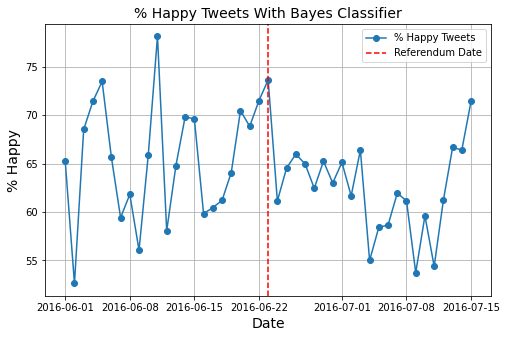

In [64]:
# Get number of happy tweets / number of total tweets in each date
num_happy_unhappy_each_date_bayes = grouped['Predicted Sentiment'].value_counts().unstack()
total = num_happy_unhappy_each_date_bayes[1] + num_happy_unhappy_each_date_bayes[-1]
percent_happy = num_happy_unhappy_each_date_bayes[1] / total * 100
# Plot % happy tweets
ax = percent_happy.plot(figsize=(8,5), grid=True, marker='o', label='% Happy Tweets')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('% Happy', fontsize=14)
ax.set_title('% Happy Tweets With Bayes Classifier', fontsize=14)

ylim = ax.get_ylim()
ax.plot([pd.to_datetime('2016-06-23'), pd.to_datetime('2016-06-23')], ylim,'r--',label='Referendum Date')
ax.set_ylim(ylim)
ax.legend()

plt.savefig('./fig/tweet/sentiment/percent_happy_bayes_clf.pdf')

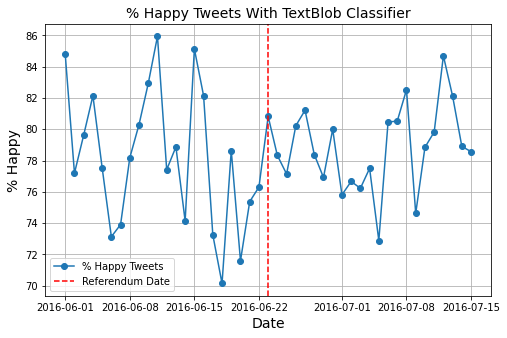

In [66]:
# Do the same for TextBlob classifier (hard classification)
num_happy_unhappy_each_date_textblob = grouped['TextBlob Sentiment'].value_counts().unstack()
total = num_happy_unhappy_each_date_textblob[1] + num_happy_unhappy_each_date_textblob[-1]
percent_happy = num_happy_unhappy_each_date_textblob[1] / total * 100

ax = percent_happy.plot(figsize=(8,5), grid=True, marker='o', label='% Happy Tweets')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('% Happy', fontsize=14)
ax.set_title('% Happy Tweets With TextBlob Classifier', fontsize=14)

ylim = ax.get_ylim()
ax.plot([pd.to_datetime('2016-06-23'), pd.to_datetime('2016-06-23')], ylim,'r--',label='Referendum Date')
ax.set_ylim(ylim)
ax.legend()

plt.savefig('./fig/tweet/sentiment/percent_happy_textblob_clf.pdf')

TextBlob Sentiment     -1     1
Predicted Sentiment            
-1                   1249  2298
 1                    853  5360


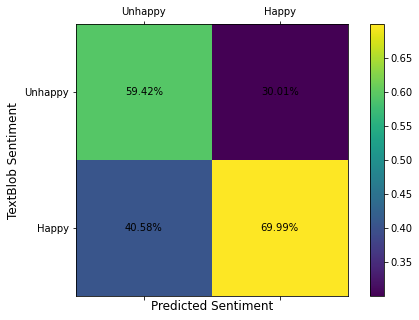

In [15]:
# Confusion matrix
df_confusion = pd.crosstab(df['Predicted Sentiment'], columns=df['TextBlob Sentiment'])
df_confusion_norm = df_confusion / df_confusion.sum(axis=0)
print(df_confusion)
fig, ax = plt.subplots(figsize=(8,5))
im = ax.matshow(df_confusion_norm)
ax.set_xlabel(df_confusion.index.name, fontsize=12)
ax.set_ylabel(df_confusion.columns.name, fontsize=12)
fig.colorbar(im, ax=ax)

# Fix tick labels
plt.xticks(ticks=[0,1], labels=['Unhappy','Happy'])
plt.yticks(ticks=[0,1], labels=['Unhappy','Happy'])

for (i,j), z in np.ndenumerate(df_confusion_norm):
    plt.text(j, i, f'{z*100:.2f}%', ha='center', va='center', color='black')

fig.savefig('./fig/tweet/sentiment/confusion_matrix.pdf')

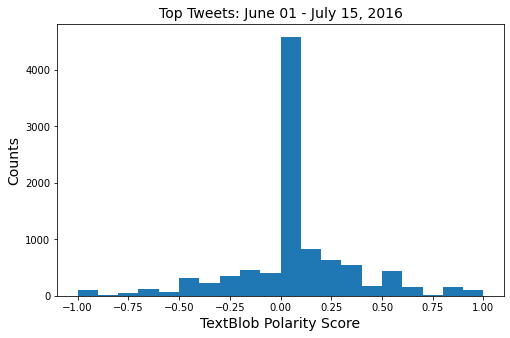

In [51]:
# Examine TextBlob scores (soft classification)

scores = df['TextBlob Sentiment Score']
ax = scores.hist(grid=False, bins=20, figsize=(8,5))
ax.set_xlabel('TextBlob Polarity Score', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('Top Tweets: June 01 - July 15, 2016', fontsize=14)
plt.savefig('./fig/tweet/sentiment/textblob_scores_toptweets.pdf')

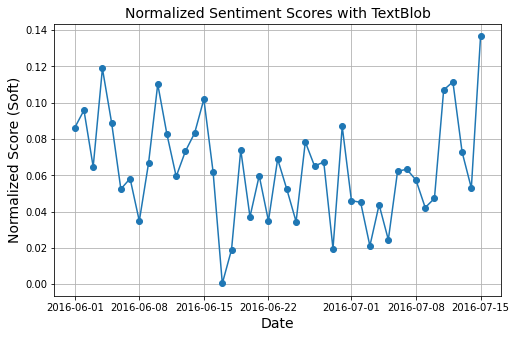

In [59]:
grouped_scores = scores.groupby('Date')
num_tweets = grouped_scores.count()
total_score = grouped_scores.sum()

# Get average soft score for each date
avg_score = total_score / num_tweets
ax = avg_score.plot(figsize=(8,5), marker='o', grid=True)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Normalized Score (Soft)', fontsize=14)
ax.set_title('Normalized Sentiment Scores with TextBlob', fontsize=14)
plt.savefig('./fig/tweet/sentiment/textblob_scoresum_soft.pdf')


## Pound Data

In [92]:
pound_usd_data_csv = './data/currency/pound/GBP_USD_historical_data.csv'
pound_eur_data_csv = './data/currency/pound/GBP_EUR_historical_data.csv'

df_usd = pd.read_csv(pound_usd_data_csv, parse_dates=[0])
df_eur = pd.read_csv(pound_eur_data_csv, parse_dates=[0])

# Create new dataframe with GBP/USD and GBP/EUR daily prices
df = pd.DataFrame(
    {'Date' : df_usd['Date'],
     'GBP/USD' : df_usd['Price'],
     'GBP/EUR' : df_eur['Price']
    }
)

df.set_index('Date', inplace=True)
df.head()

,GBP/USD,GBP/EUR
Date,,
2016-07-15,1.3193,1.1955
2016-07-14,1.3342,1.1999
2016-07-13,1.3147,1.1855
2016-07-12,1.3243,1.1974
2016-07-11,1.2994,1.1751


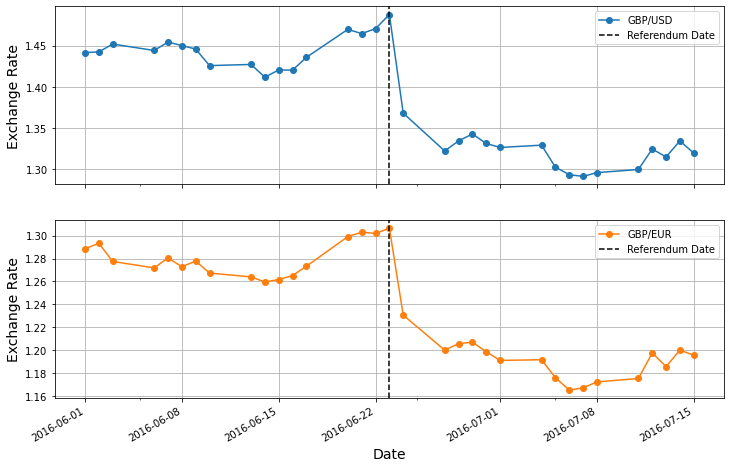

In [99]:
axes = df.plot(subplots=True, figsize=(12,8), grid=True, marker='o')
axes[1].set_xlabel('Date', fontsize=14)
axes[0].set_ylabel('Exchange Rate', fontsize=14)
axes[1].set_ylabel('Exchange Rate', fontsize=14)


for ax in axes:
    ylim = ax.get_ylim()
    ax.plot([pd.to_datetime('2016-06-23'), pd.to_datetime('2016-06-23')], ylim, 'k--', label='Referendum Date')
    ax.legend()
    ax.set_ylim(ylim)

plt.savefig('./fig/currency/pound/gbp_data.pdf')